In [ ]:
""" IMPORT ALL DEPENDENCIES"""


# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline
# import color maps
from matplotlib.colors import ListedColormap

# Seaborn for easier visualization
import seaborn as sns

In [ ]:
df = pd.read_csv("fer2013.csv")
df.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [ ]:
df

emotion                                             pixels     Usage
0          0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1          0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2          2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3          4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4          6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
..       ...                                                ...       ...
867        5  188 188 187 187 195 155 41 36 29 24 20 20 14 7...  Training
868        5  209 206 187 137 107 95 67 61 56 77 124 176 198...  Training
869        2  64 73 56 78 100 60 49 59 71 93 115 122 132 195...  Training
870        3  28 27 29 40 58 71 78 69 31 26 20 15 16 11 14 1...  Training
871        2  80 80 76 74 75 83 78 83 94 79 79 92 87 81 55 6...       NaN

[872 rows x 3 columns]

In [ ]:
df.shape

(872, 3)

## **Plotting emotion**

<Axes: xlabel='emotion', ylabel='count'>

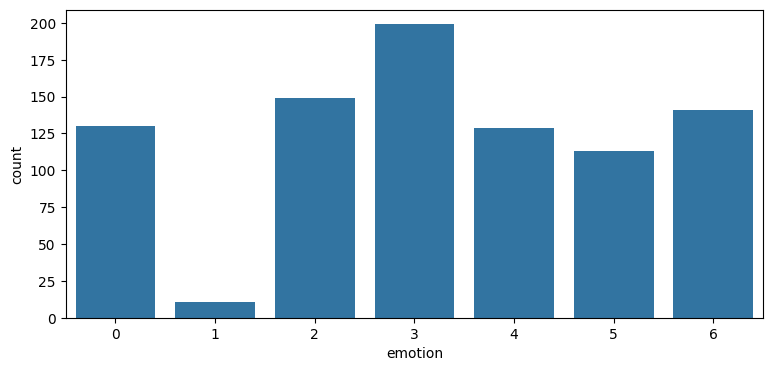

In [ ]:
""" matplotlib => to define size , sns => to use counterplot """

plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=df)

In [ ]:
df['emotion'].value_counts()

emotion
3    199
2    149
6    141
0    130
4    129
5    113
1     11
Name: count, dtype: int64

* where ** 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral**

### Observation
* for Digust we have about 547 images only very less.

## **Plotting Usage**

<Axes: xlabel='Usage', ylabel='count'>

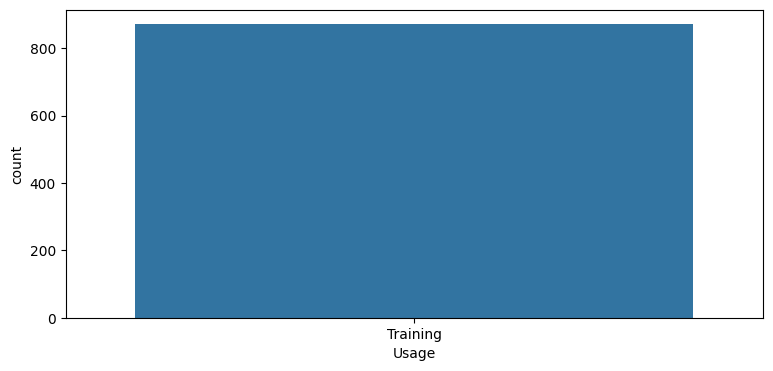

In [ ]:

plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=df)

In [ ]:
df['Usage'].value_counts()

Usage
Training    871
Name: count, dtype: int64

# PreProcessing

In [ ]:
import cv2
image_size=(48,48)

In [ ]:
import numpy as np
import pandas as pd
import cv2

image_size = (48, 48)  # Define target image size
width, height = 48, 48

pixels = df['pixels'].tolist()  # Extract pixel values
faces = []

for pixel_sequence in pixels:
    pixel_values = [int(pixel) for pixel in pixel_sequence.split(' ') if pixel]  # Convert to int list

    if len(pixel_values) != width * height:  # Ensure correct number of pixels
        print(f"Skipping an image with {len(pixel_values)} pixels instead of 2304")
        continue

    face = np.asarray(pixel_values, dtype=np.uint8).reshape(width, height)  # Reshape to (48,48)
    face = cv2.resize(face, image_size)  # Resize (should already be 48x48, but keeping it for safety)
    faces.append(face.astype('float32'))  # Convert to float32 and append

faces = np.asarray(faces)  # Convert list to numpy array
faces = np.expand_dims(faces, -1)  # Add channel dimension for grayscale images

# One-hot encode the emotion labels
emotions = pd.get_dummies(df['emotion']).to_numpy()


Skipping an image with 1263 pixels instead of 2304


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
df = pd.read_csv("fer2013.csv")

# Define directories
train_dir = "data/train"
val_dir = "data/val"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Image parameters
img_height, img_width = 224, 224
num_classes = 7

# Convert pixel values to images
for index, row in df.iterrows():
    try:
        emotion = str(row['emotion'])  # Get emotion label
        pixel_values = row['pixels'].split()  # Convert to list

        # Ensure correct number of pixels (48x48 = 2304)
        if len(pixel_values) != 2304:
            print(f"Skipping row {index} due to incorrect pixel size: {len(pixel_values)}")
            continue

        pixels = np.array(pixel_values, dtype=np.uint8).reshape(48, 48)  # Reshape

        # Resize image to 224x224 (for VGG16)
        img = cv2.resize(pixels, (img_height, img_width))

        # Define the directory (80% train, 20% validation)
        folder = train_dir if index % 5 != 0 else val_dir
        class_dir = os.path.join(folder, emotion)
        os.makedirs(class_dir, exist_ok=True)

        # Save the image
        img_path = os.path.join(class_dir, f"{index}.jpg")
        cv2.imwrite(img_path, img)

    except Exception as e:
        print(f"Error processing row {index}: {e}")
        continue  # Skip the problematic row

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)


Skipping row 1747 due to incorrect pixel size: 493
Found 1397 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers

input_shape = (img_height, img_width, 3)

# Load VGG16 without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False  # Freeze all VGG16 layers

# Add custom layers
vgg16_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Better than Flatten() for reducing parameters
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
vgg16_model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

vgg16_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,255 (56.39 MB)

 Trainable params: 66,567 (260.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Unfreeze last 4 layers of VGG16 for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with lower learning rate for fine-tuning
vgg16_model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


In [ ]:
# First train with frozen VGG16 layers
epochs = 10
history_vgg16 = vgg16_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)
print("Initial training complete.")

# Now unfreeze last 4 layers for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile with lower learning rate
vgg16_model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-5),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Fine-tune for a few more epochs
fine_tune_epochs = 5
history_vgg16_finetune = vgg16_model.fit(
    train_generator,
    epochs=fine_tune_epochs,
    validation_data=validation_generator
)

print("Fine-tuning complete.")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 912ms/step - accuracy: 0.1805 - loss: 2.0667 - val_accuracy: 0.2514 - val_loss: 1.8154
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 449ms/step - accuracy: 0.2342 - loss: 1.8954 - val_accuracy: 0.2514 - val_loss: 1.7817
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 467ms/step - accuracy: 0.2342 - loss: 1.8189 - val_accuracy: 0.2714 - val_loss: 1.7682
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 448ms/step - accuracy: 0.2417 - loss: 1.7985 - val_accuracy: 0.2829 - val_loss: 1.7476
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 451ms/step - accuracy: 0.2757 - loss: 1.7760 - val_accuracy: 0.3286 - val_loss: 1.7215
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 484ms/step - accuracy: 0.2698 - loss: 1.7390 - val_accuracy: 0.3429 - val_loss: 1.7039
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 453ms/step - accuracy: 0.2883 - loss: 1.7509 - val_accuracy: 0.3114 - val_loss: 1.6847
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - accuracy: 0.2837 - loss: 1.7335 - val_accu

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Assuming model is already loaded globally (e.g., VGG16 model)

# Define emotion labels (ensure this matches your model's output)
emotion_dict = {
    0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy",
    4: "Neutral", 5: "Sad", 6: "Surprise"
}

# Define emojis for emotions
emojis = ["😡", "🤢", "😨", "😁", "😐", "😞", "😲"]

def _predict(path):
    # Load Haar Cascade for face detection
    facecasc = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

    # Load the image and convert to grayscale
    imagePath = '/content/' + path
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = facecasc.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=10)
    print("No of faces detected: ", len(faces))

    # Process each detected face
    for i, (x, y, w, h) in enumerate(faces, 1):
        # Draw rectangle around the face
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Crop and preprocess the face region (resize to 48x48)
        roi_gray = gray[y:y + h, x:x + w]  # Crop face region
        cropped_img = cv2.resize(roi_gray, (48, 48))  # Resize to 48x48

        # Convert grayscale to RGB (3 channels)
        cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_GRAY2RGB)  # Convert to 3 channels (RGB)

        # Resize to (224, 224) for VGG16 input
        cropped_img_rgb = cv2.resize(cropped_img_rgb, (224, 224))  # Resize to (224, 224)

        # Normalize the image (same as during training)
        cropped_img_rgb = np.expand_dims(cropped_img_rgb, axis=0)  # Add batch dimension
        cropped_img_rgb = cropped_img_rgb / 255.0

        # Make prediction
        prediction = vgg16_model.predict(cropped_img_rgb)
        maxindex = int(np.argmax(prediction))  # Get the index of the highest predicted emotion

        # Print predicted emotion and emoji
        print(f"Person {i}: {emotion_dict[maxindex]} --> {emojis[maxindex]}")

        # Put the emotion label on the image
        cv2.putText(image, emotion_dict[maxindex], (x + 10, y - 20),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

    # Show the image with predicted emotions
    cv2_imshow(image)




No of faces detected:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Person 1: Happy --> 😁


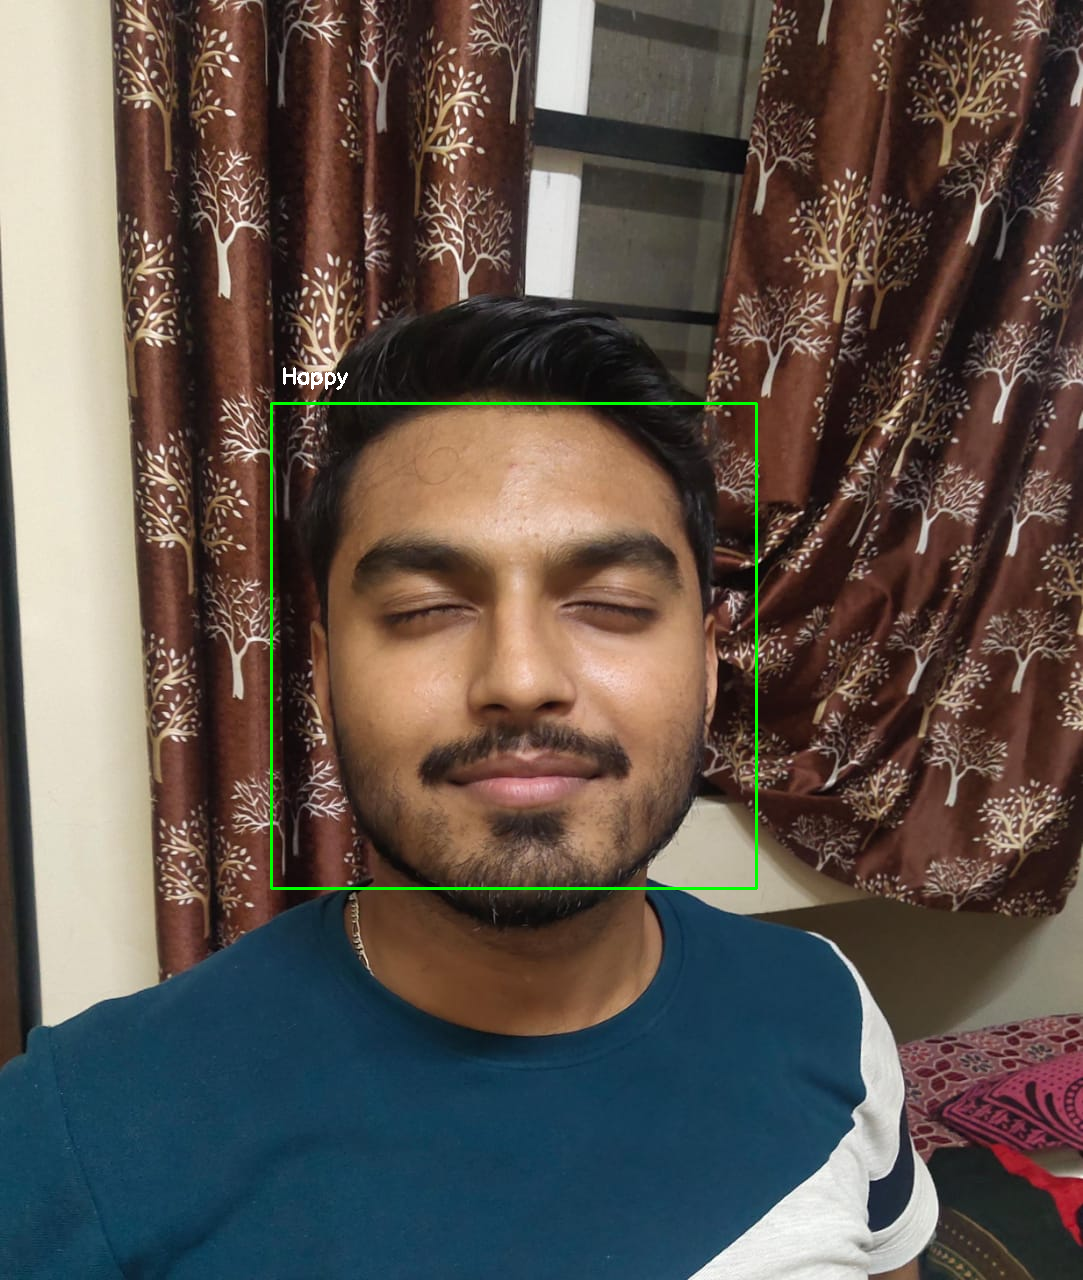

In [ ]:
_predict("IMG-20250218-WA0014.jpg")

No of faces detected:  0


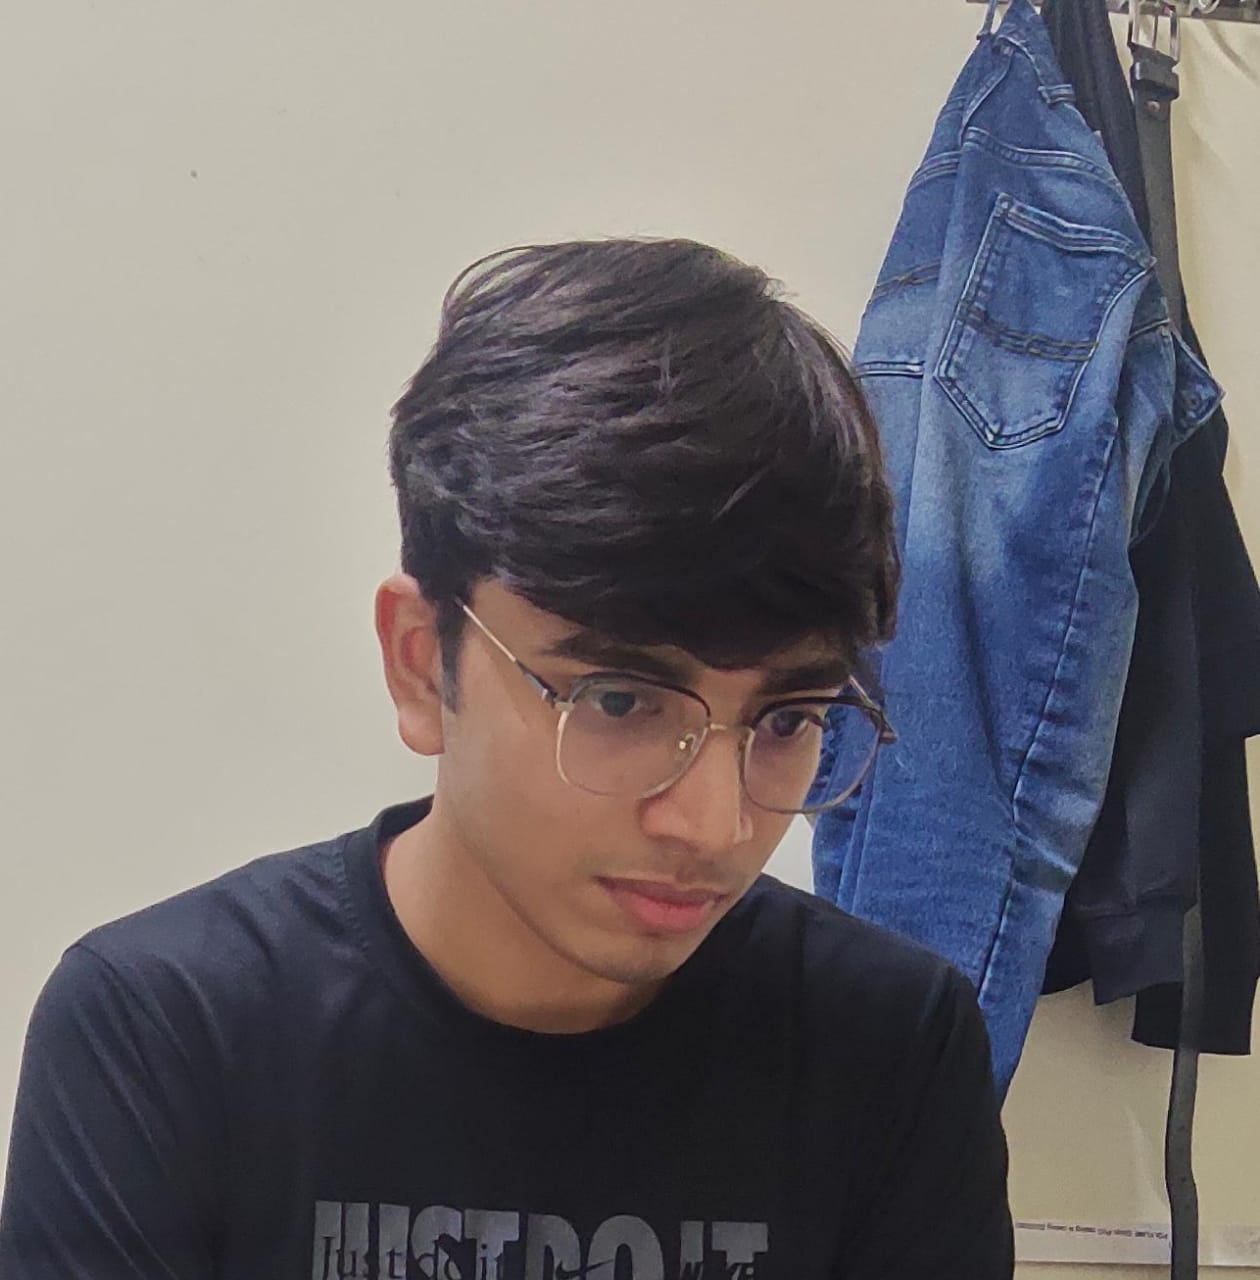

In [ ]:
_predict("IMG-20250218-WA0010.jpg")

No of faces detected:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Person 1: Surprise --> 😲


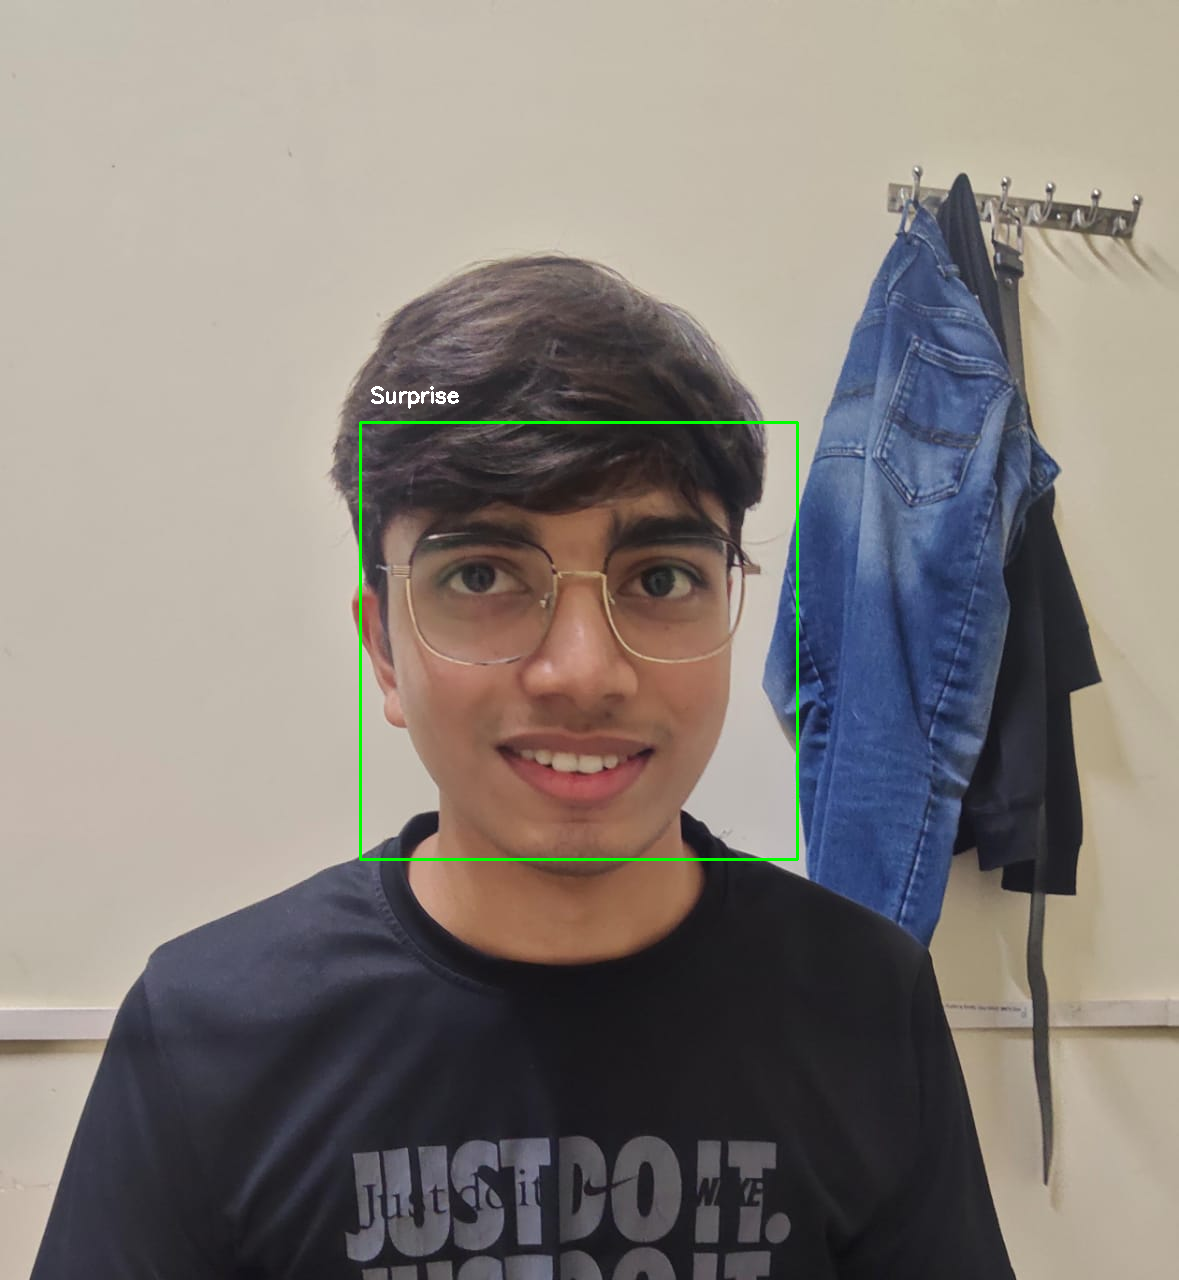

In [ ]:
_predict("IMG-20250218-WA0011.jpg")

No of faces detected:  0


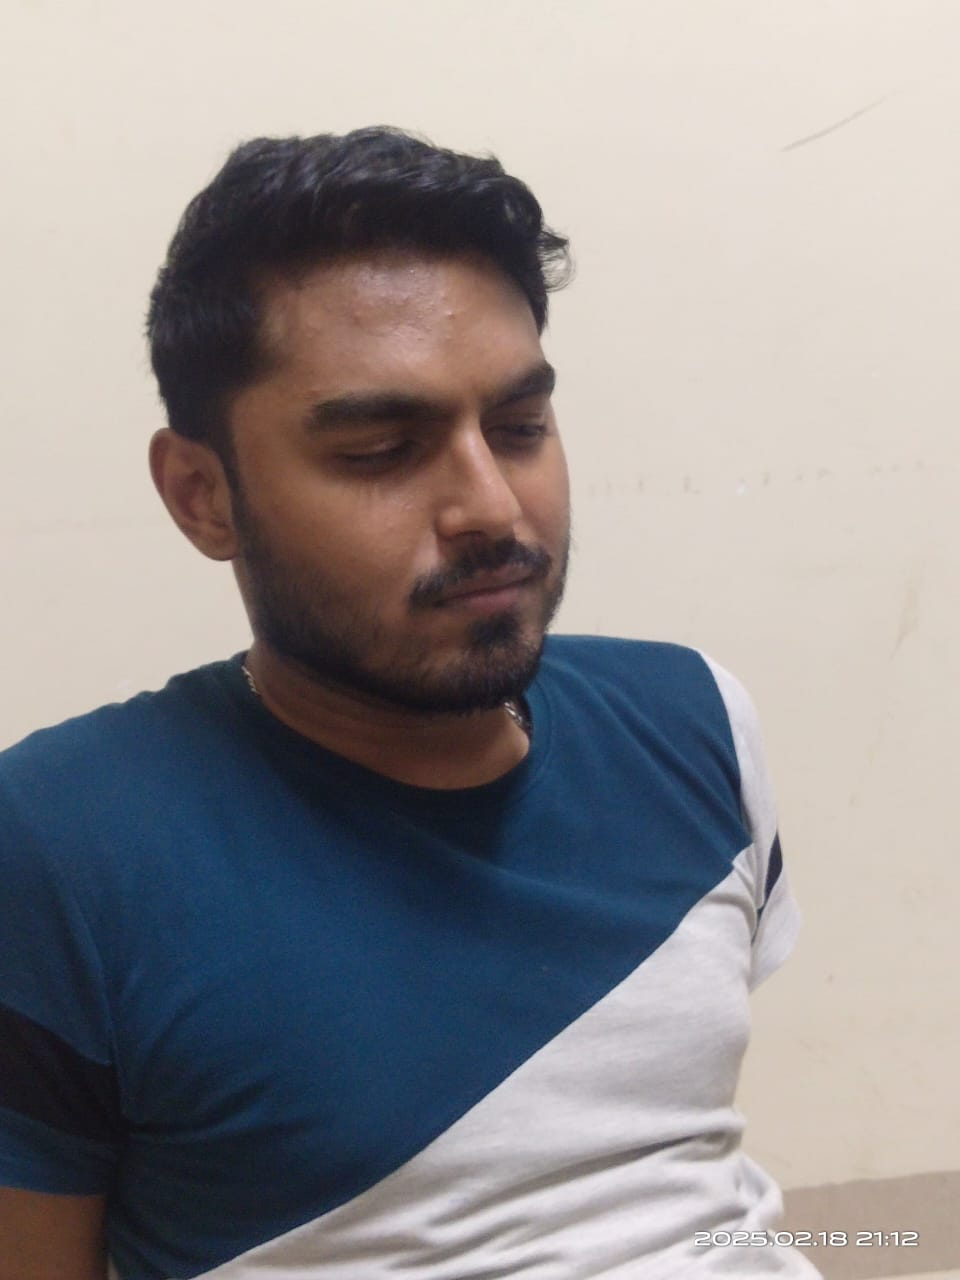

In [ ]:
_predict("IMG-20250218-WA0009.jpg")

In [ ]:
import os

test_image_path = "/content/IMG-20250218-WA0009.jpg"  # Correct the path

if not os.path.exists(test_image_path):
    print(f"Error: File not found at {test_image_path}")
else:
    print("File exists! Proceeding with prediction.")


File exists! Proceeding with prediction.


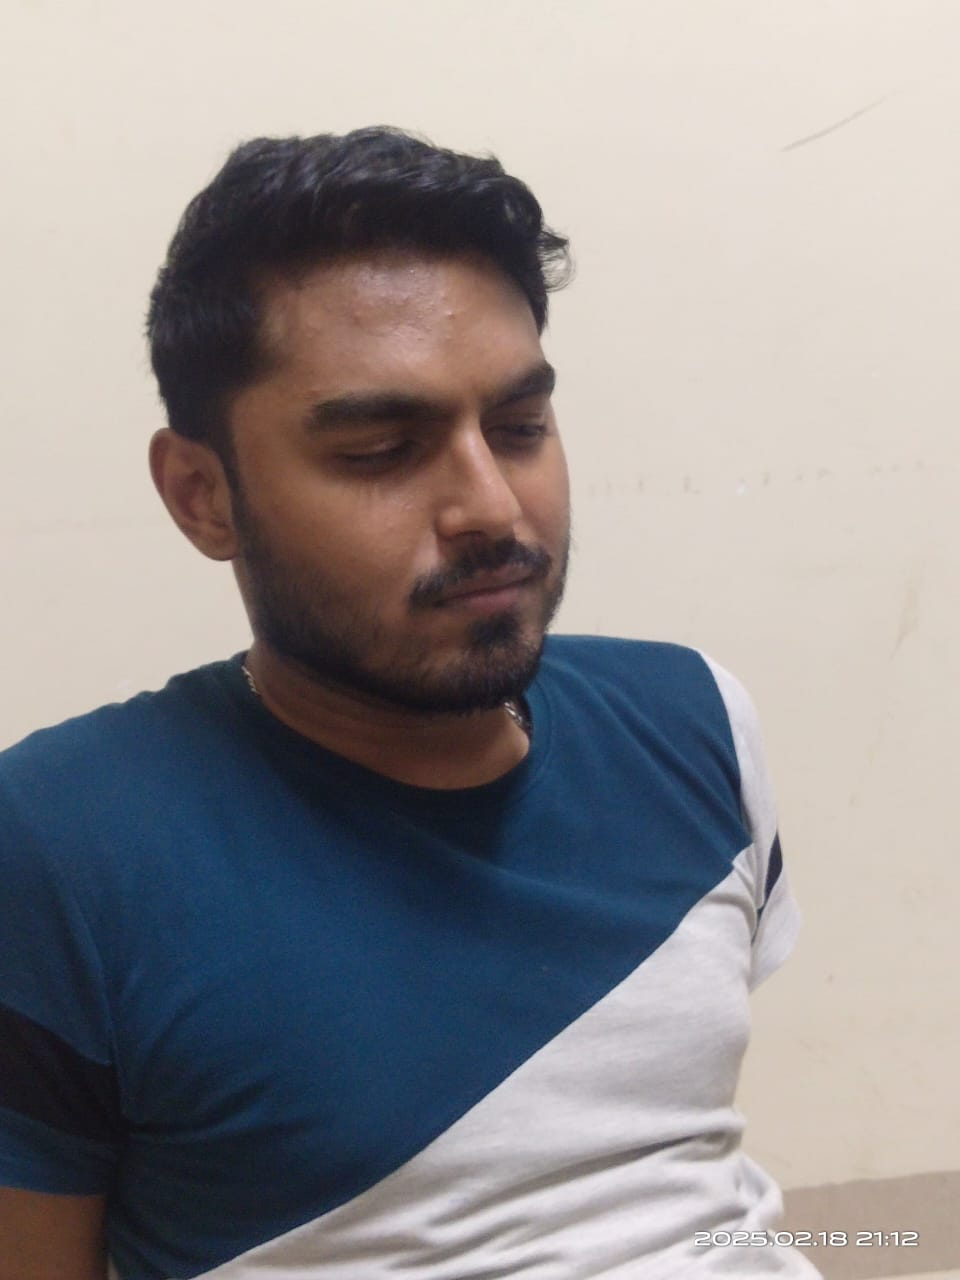

In [ ]:
from IPython.display import Image

display(Image("/content/IMG-20250218-WA0009.jpg"))